In [15]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import sklearn.neighbors._base 
import sys
sys.modules['sklearn.neighbors.base'] = sklearn.neighbors._base

from missingpy import MissForest
from sklearn.impute import KNNImputer

In [16]:
df = pd.read_stata('../data/IBNET3a4py.dta')
df.head(14).T

,0,1,2,3,4,5,6,7,8,9,10,11,12,13
Year,2004.0,2.005000e+03,2.006000e+03,2.007000e+03,2.008000e+03,2.009000e+03,2.010000e+03,2.011000e+03,2.012000e+03,2.013000e+03,2.014000e+03,2.015000e+03,2016.0,2017.0
s1,NaN,NaN,2.754570e+08,NaN,2.773810e+08,2.773810e+08,3.015390e+08,3.015390e+08,3.015390e+08,2.773810e+08,3.015390e+08,3.785400e+07,NaN,NaN
t2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
t3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
t4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
s3,NaN,2.000000e+04,1.300000e+04,6.000000e+03,5.800000e+03,5.800000e+03,6.000000e+03,6.000000e+03,5.000000e+03,5.460000e+03,5.359000e+03,5.273667e+03,NaN,NaN
s4,0.0,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.0,1.0
s5,1.0,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.0,1.0
s6,NaN,1.980000e+04,2.000000e+03,3.000000e+03,2.900000e+03,2.870000e+03,2.880000e+03,2.880000e+03,2.890000e+03,2.900000e+03,2.898000e+03,2.737417e+03,NaN,NaN
s8,NaN,2.030000e+01,2.030000e+01,5.250000e+01,2.840000e+01,2.000000e+01,2.000000e+01,2.000000e+01,2.000000e+01,2.030000e+01,2.030000e+01,2.030000e+01,NaN,NaN


In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26571 entries, 0 to 26570
Data columns (total 24 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Year       26571 non-null  int16  
 1   s1         6989 non-null   float64
 2   t2         3065 non-null   float64
 3   t3         2867 non-null   float64
 4   t4         2507 non-null   float64
 5   s3         15474 non-null  float64
 6   s4         26401 non-null  float64
 7   s5         12529 non-null  float64
 8   s6         15477 non-null  float64
 9   s8         14802 non-null  float64
 10  y1         15471 non-null  float64
 11  y2         15153 non-null  float64
 12  y3         13757 non-null  float64
 13  t5         1958 non-null   float64
 14  t1         1961 non-null   float64
 15  ID         26571 non-null  int16  
 16  dc7        15181 non-null  float64
 17  dc8        12288 non-null  float64
 18  dc9        14928 non-null  float64
 19  dc3        13907 non-null  float64
 20  dc4   

C:\Users\doris\AppData\Local\Temp\ipykernel_8508\3131789932.py:6: UserWarning: The palette list has more values (10) than needed (2), which may not be intended.
  g = sns.displot(


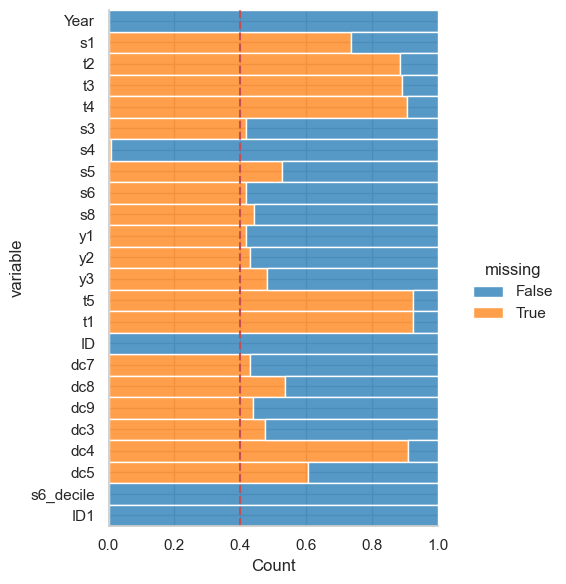

In [18]:
import seaborn as sns

palette = sns.color_palette("tab10")
sns.set(style="whitegrid") 

g = sns.displot(
    data=df.isnull().melt(value_name='missing'),
    y='variable',
    hue='missing',
    multiple='fill',
    palette=palette,
    height=6,
    aspect=0.8
)

# Add a vertical line at 0.4 threshold
plt.axvline(0.4, color='r', ls='--')

# Improve layout and show the plot
#plt.tight_layout()
plt.show()

In [19]:
# missing forest
import warnings
import logging
logging.getLogger().setLevel(logging.WARNING)
warnings.filterwarnings('ignore', message="No missing value located; returning original dataset.")
warnings.filterwarnings('ignore', category=FutureWarning)

for idx in df["ID1"].unique():
    subset = df[df["ID1"] == idx]  # Get the subset of the dataframe
    
    # Identify columns with all missing values
    cols_fully_missing = subset.columns[subset.isnull().all()]
    
    # Continue only if there's at least one column with some data
    if not subset.drop(columns=cols_fully_missing).empty:  
        imputer = MissForest(max_iter=5, n_jobs=-1)
        # Impute only on columns that are not fully missing
        x_imp = imputer.fit_transform(subset.drop(columns=cols_fully_missing))
        
        # Update the dataframe with imputed values
        df.loc[df["ID1"] == idx, subset.columns.difference(cols_fully_missing)] = x_imp
    else:
        print(f"No usable data for ID1 = {idx}. Skipping...")


Iteration: 0
Iteration: 1
Iteration: 2
Iteration: 0
Iteration: 1
Iteration: 2
Iteration: 0
Iteration: 1
Iteration: 2
Iteration: 3
Iteration: 4
Iteration: 0
Iteration: 1
Iteration: 2
Iteration: 3
Iteration: 0
Iteration: 1
Iteration: 2
Iteration: 3
Iteration: 0
Iteration: 1
Iteration: 2
Iteration: 3
Iteration: 0
Iteration: 1
Iteration: 2
Iteration: 0
Iteration: 1
Iteration: 2
Iteration: 0
Iteration: 1
Iteration: 2
Iteration: 3
Iteration: 0
Iteration: 1
Iteration: 2
Iteration: 3
Iteration: 4
Iteration: 0
Iteration: 1
Iteration: 2
Iteration: 3
Iteration: 0
Iteration: 1
Iteration: 2
Iteration: 0
Iteration: 1
Iteration: 2
Iteration: 0
Iteration: 1
Iteration: 0
Iteration: 1
Iteration: 2
Iteration: 0
Iteration: 1
Iteration: 2
Iteration: 0
Iteration: 1
Iteration: 2
Iteration: 0
Iteration: 1
Iteration: 2
Iteration: 3
Iteration: 4
Iteration: 0
Iteration: 1
Iteration: 2
Iteration: 3
Iteration: 0
Iteration: 1
Iteration: 2
Iteration: 3
Iteration: 0
Iteration: 1
Iteration: 2
Iteration: 0
Iteration: 1

KeyboardInterrupt: 

C:\Users\doris\AppData\Local\Temp\ipykernel_8508\800155416.py:1: UserWarning: The palette list has more values (10) than needed (2), which may not be intended.
  g = sns.displot(


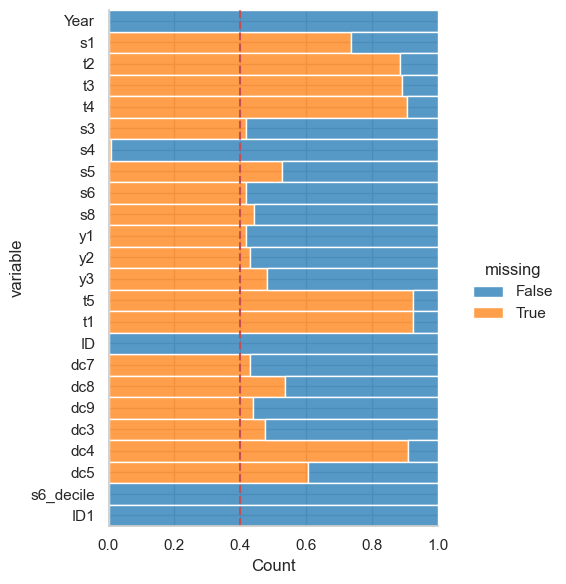

In [10]:
g = sns.displot(
    data=df.isnull().melt(value_name='missing'),
    y='variable',
    hue='missing',
    multiple='fill',
    palette=palette,
    height=6,
    aspect=0.8
)

# Add a vertical line at 0.4 threshold
plt.axvline(0.4, color='r', ls='--')

# Improve layout and show the plot
#plt.tight_layout()
plt.show()

In [11]:
from sklearn.impute import KNNImputer
imputer = KNNImputer(n_neighbors=5)

for idx in df["ID1"].unique():
    # Subsetting the dataframe for the current decile
    idx_rows = df[df["ID1"] == idx].index
    
    # Ensure the subset is not empty
    if not idx_rows.empty:
        # Impute using only the rows from the current decile
        knn_imp = imputer.fit_transform(df.loc[idx_rows, :])
        
        # Ensure the output shape matches and update the dataframe
        if len(idx_rows) == knn_imp.shape[0]:
            df.loc[idx_rows, :] = knn_imp
        else:
            print(f"Shape mismatch error for s6_decile = {idx}")
    else:
        print(f"No data for s6_decile = {idx}. Skipping...")


c:\Users\doris\miniconda3\envs\531\Lib\site-packages\sklearn\utils\validation.py:757: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
c:\Users\doris\miniconda3\envs\531\Lib\site-packages\sklearn\utils\validation.py:595: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
c:\Users\doris\miniconda3\envs\531\Lib\site-packages\sklearn\utils\validation.py:604: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
c:\Users\doris\miniconda3\envs\531\Lib\site-packages\sklearn\utils\validation.py:757: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinsta

ValueError: Must have equal len keys and value when setting with an ndarray

C:\Users\doris\AppData\Local\Temp\ipykernel_8508\800155416.py:1: UserWarning: The palette list has more values (10) than needed (2), which may not be intended.
  g = sns.displot(


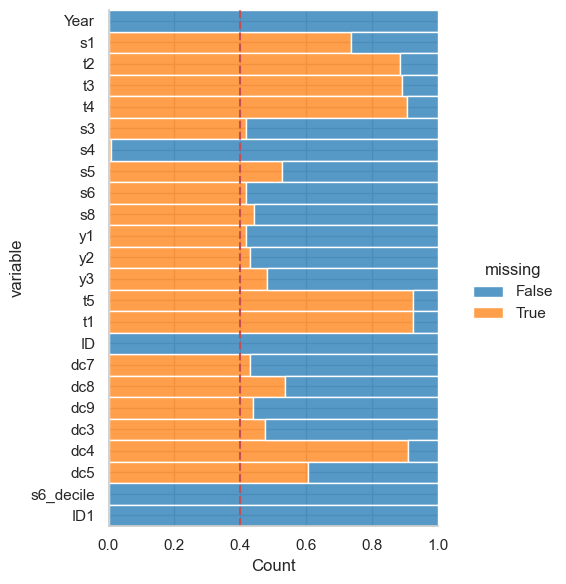

In [12]:
g = sns.displot(
    data=df.isnull().melt(value_name='missing'),
    y='variable',
    hue='missing',
    multiple='fill',
    palette=palette,
    height=6,
    aspect=0.8
)

# Add a vertical line at 0.4 threshold
plt.axvline(0.4, color='r', ls='--')

# Improve layout and show the plot
#plt.tight_layout()
plt.show()

In [14]:
from fancyimpute import IterativeImputer
import numpy as np

# Initialize MICE imputer
mice_imputer = IterativeImputer(
    missing_values=np.nan, 
    sample_posterior=False, 
    max_iter=100, 
    tol=0.001, 
    random_state=0,
    n_nearest_features=30, 
    initial_strategy='mean'
)

for idx in df["ID1"].unique():
    # Get the subset of the DataFrame for the current index value
    subset = df[df["ID1"] == idx]
    
    # Ensure the subset is not empty
    if not subset.empty:
        # Perform MICE imputation on the subset
        mice_imp = mice_imputer.fit_transform(subset)
        
        # Assign the imputed data back to the DataFrame
        df.loc[df["ID1"] == idx, :] = mice_imp
    else:
        # Print a message or handle cases where the subset is empty
        print(f"No data found for ID1 = {idx}")

c:\Users\doris\miniconda3\envs\531\Lib\site-packages\sklearn\utils\validation.py:757: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
c:\Users\doris\miniconda3\envs\531\Lib\site-packages\sklearn\utils\validation.py:595: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
c:\Users\doris\miniconda3\envs\531\Lib\site-packages\sklearn\utils\validation.py:604: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
c:\Users\doris\miniconda3\envs\531\Lib\site-packages\sklearn\utils\validation.py:757: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinsta

ValueError: Must have equal len keys and value when setting with an ndarray